In [2]:
# First, add the LatentDynamics directory (which houses the solvers) to the system path.
import  os;
import  sys;

LD_Path : str = os.path.join(os.path.join(os.path.pardir, "src"), "LatentDynamics");
sys.path.append(LD_Path);

import  math;

import  numpy;
import  matplotlib          as      mpl;
import  matplotlib.pyplot   as      plt;
#import  seaborn;
import  colorsys;

from    Solvers             import  RK1, RK2, RK4;


def Initialize_MPL() -> None:
    """
    This function initialize matplotlib's parameter so that the plots it generates are less ugly.
    This function has no arguments or return variables.
    """

    # Now... let's set up plot formatting.
    def scale_lightness(rgb, scale_l):
        # convert rgb to hls
        h, l, s = colorsys.rgb_to_hls(*rgb)

        # manipulate h, l, s values and return as rgb
        return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

    #seaborn.set_context(context     = "paper");
    #seaborn.set_style(  style       = "darkgrid");
    mpl.rcParams["lines.linewidth"] = 2;
    mpl.rcParams["axes.linewidth"]  = 1.5;
    mpl.rcParams["axes.edgecolor"]  = "black";
    mpl.rcParams["grid.color"]      = "gray";
    mpl.rcParams["grid.linestyle"]  = "dotted";
    mpl.rcParams["grid.linewidth"]  = .67;
    mpl.rcParams["xtick.labelsize"] = 10;
    mpl.rcParams["ytick.labelsize"] = 10;
    mpl.rcParams["axes.labelsize"]  = 11;
    mpl.rcParams["axes.titlesize"]  = 12;
    mpl.rcParams["axes.facecolor"]  = scale_lightness(mpl.colors.ColorConverter.to_rgb("lightgrey"), 1.15);

Initialize_MPL();

### Compute the Numerical Solution

In [3]:
k   : float = 1.0;
c   : float = 0.1;

def F(t : float, y : numpy.ndarray, Dy : numpy.ndarray):
    return -k*y - c*Dy;

D0  : numpy.ndarray = numpy.array([5.0], dtype = numpy.float32);
V0  : numpy.ndarray = numpy.array([-5.0], dtype = numpy.float32);
h   : float         = 0.05;
N   : int           = 1000;

D_1, V_1, T_1 = RK1(f = F, y0 = D0, Dy0 = V0, h = h,    N = N);
D_2, V_2, T_2 = RK2(f = F, y0 = D0, Dy0 = V0, h = h,    N = N);
D_4, V_4, T_4 = RK4(f = F, y0 = D0, Dy0 = V0, h = h,    N = N);

### Compute the Exact Solution 

In [4]:
c2  : float = c/2;
w   : float = math.sqrt(k - c2*c2);

A   : float = D0;
B   : float = (V0 + D0*c2)/w

def Displacement(T : numpy.ndarray) -> numpy.ndarray:
    return A*numpy.multiply(numpy.exp(-c2*T), numpy.cos(T*w)) + B*numpy.multiply(numpy.exp(-c2*T), numpy.sin(T*w));

def Velocity(T : numpy.ndarray) -> numpy.ndarray:
    return  (A*(-c2))   *numpy.multiply(numpy.exp((-c2)*T), numpy.cos(T*w)) + \
            (-A*w)      *numpy.multiply(numpy.exp((-c2)*T), numpy.sin(T*w)) + \
            (B*(-c2))   *numpy.multiply(numpy.exp((-c2)*T), numpy.sin(T*w)) + \
            (B*w)       *numpy.multiply(numpy.exp((-c2)*T), numpy.cos(T*w));

T   : numpy.ndarray = numpy.linspace(start = 0, stop = N*h, num = N + 1);
D   : numpy.ndarray = Displacement(T);
V   : numpy.ndarray = Velocity(T);

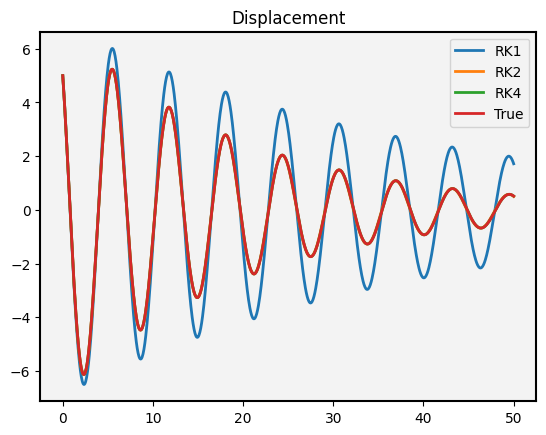

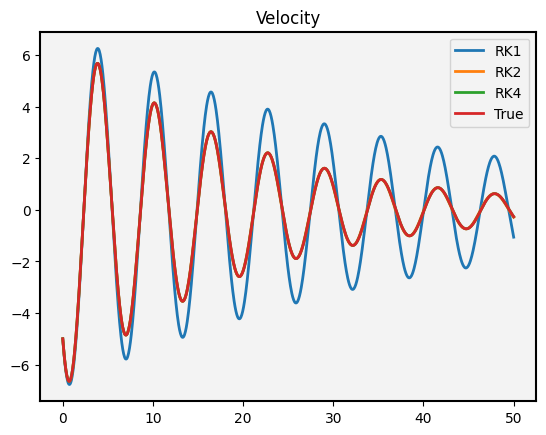

In [5]:
plt.figure();
plt.plot(T_1,   D_1,    label = "RK1");
plt.plot(T_2,   D_2,    label = "RK2");
plt.plot(T_4,   D_4,    label = "RK4");
plt.plot(T,     D,      label = "True");

plt.title("Displacement");
plt.legend();



plt.figure();
plt.plot(T_1,   V_1,    label = "RK1");
plt.plot(T_2,   V_2,    label = "RK2");
plt.plot(T_4,   V_4,    label = "RK4");
plt.plot(T,     V,      label = "True");

plt.title("Velocity");
plt.legend();



plt.show()

### Multi-dimensional test

In [6]:
m0 = 1.0;
m1 = 4.0;
m2 = 1.0;

k0 = 4.0;
k1 = 2.0;
k2 = 2.0;
k3 = 5.0;

c0 = 0.05;
c1 = 0.1;
c2 = 0.2;
c3 = 0.4;

K = numpy.empty((3,3), dtype = numpy.float32);
K[0, :]     = [k0 + k1, -k1,        0           ];
K[1, :]     = [-k1,     k1 + k2,    -k2         ];
K[2, :]     = [0,       -k2,        k2 + k3     ];
K[0, :]     = K[0, :]/m0;
K[1, :]     = K[1, :]/m1;
K[2, :]     = K[2, :]/m2;

C = numpy.ndarray((3,3), dtype = numpy.float32);
C[0, :]     = [c0 + c1,     -c1,        0       ];
C[1, :]     = [-c1,         c1 + c2,    -c2     ];
C[2, :]     = [0,           -c2,        c2 + c3 ];
C[0, :]     = C[0, :]/m0;
C[1, :]     = C[1, :]/m1;
C[2, :]     = C[2, :]/m2;


def G(t : float, y : numpy.ndarray, Dy : numpy.ndarray):
    return -numpy.dot(K, y) - numpy.dot(C, Dy);



In [7]:
D0  : numpy.ndarray = numpy.array([1.0, 1.0, 1.0], dtype = numpy.float32);
V0  : numpy.ndarray = numpy.array([-1.0, 2.0, -1.0], dtype = numpy.float32);
h   : float         = 0.1;

D_2, V_2, T_2 = RK2(f = G, y0 = D0, Dy0 = V0, h = h/5,  N = 100*5);
D_4, V_4, T_4 = RK4(f = G, y0 = D0, Dy0 = V0, h = h,    N = 100);

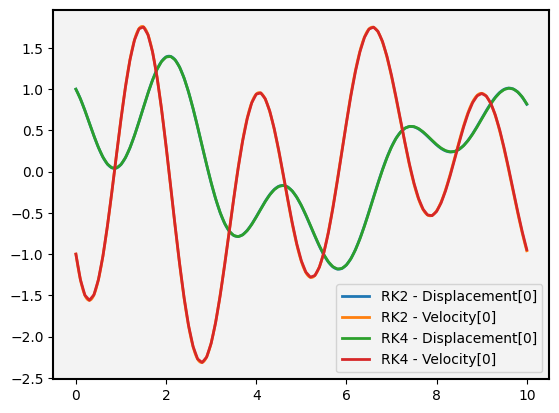

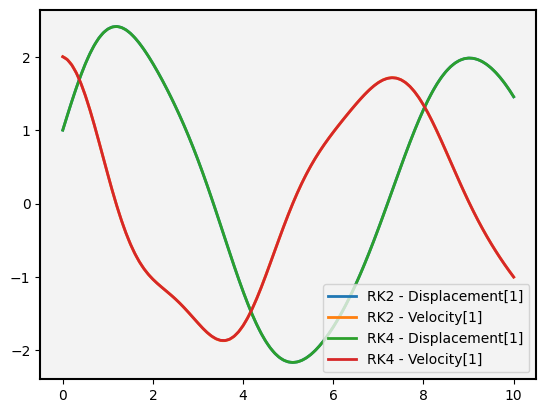

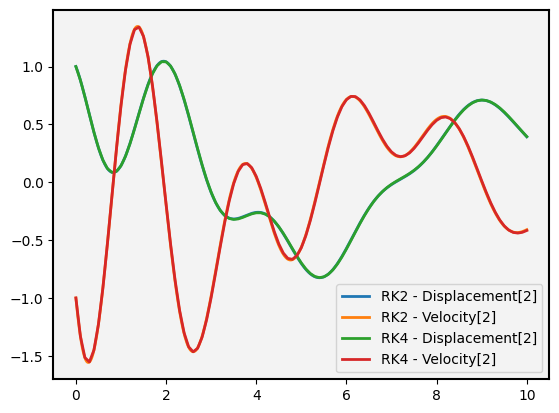

In [8]:
plt.figure();
plt.plot(T_2, D_2[:, 0],    label = "RK2 - Displacement[0]");
plt.plot(T_2, V_2[:, 0],    label = "RK2 - Velocity[0]");

plt.plot(T_4, D_4[:, 0],    label = "RK4 - Displacement[0]");
plt.plot(T_4, V_4[:, 0],    label = "RK4 - Velocity[0]");

plt.legend();



plt.figure();
plt.plot(T_2, D_2[:, 1],    label = "RK2 - Displacement[1]");
plt.plot(T_2, V_2[:, 1],    label = "RK2 - Velocity[1]");

plt.plot(T_4, D_4[:, 1],    label = "RK4 - Displacement[1]");
plt.plot(T_4, V_4[:, 1],    label = "RK4 - Velocity[1]");

plt.legend();



plt.figure();
plt.plot(T_2, D_2[:, 2],    label = "RK2 - Displacement[2]");
plt.plot(T_2, V_2[:, 2],    label = "RK2 - Velocity[2]");

plt.plot(T_4, D_4[:, 2],    label = "RK4 - Displacement[2]");
plt.plot(T_4, V_4[:, 2],    label = "RK4 - Velocity[2]");

plt.legend();
plt.show();

